In [1]:
#math library for writing sq.rt
import math

In [2]:
# General imports
import numpy as np

# Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

In [3]:
# runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator

#AerSimulator
from qiskit_aer import AerSimulator
from scipy.optimize import basinhopping

#QiskitRuntimeService.save_account(channel="ibm_quantum",instance="ibm-q/open/main", token="36d68aac6ec2fa23a6cc3da232ae7e0e579d4f0125eb5feda65ec8f633c4e682328b1c72ae69dcbae910b40c98df7a11366289bad70db6157fabedd5336adc2f", overwrite=True, set_as_default=False)
service = QiskitRuntimeService(channel='ibm_quantum')
#service.backends(simulator=True, operational=True, min_num_qubits=5)
#backend = service.least_busy(min_num_qubits=127)
#print(backend)

#simulator
backend = AerSimulator()


In [4]:
l01 = math.sqrt(2)
l02 = math.sqrt(10)
l03 = 3
l12 = 2
l13 = math.sqrt(5)
l23 = 1
g = 20

In [5]:
H0 = SparsePauliOp.from_sparse_list([("", [], l01), ("", [], l02), ("", [], l03), ("", [], l12), ("", [], l13), ("", [], l23), ("Z", [0], l01/4), ("Z", [0], l02/4), ("Z", [0], l03/2), ("Z", [1], l01/2), ("Z", [1], l02/2), ("Z", [2], l01/4), ("Z", [2], l02/4), ("Z", [2], l03/2), ("Z", [3], l01/4), ("Z", [3], l12/4), ("Z", [3], l13/2),  ("ZZ", [1,3], l01/4), ("Z", [4], l01/2), ("Z", [4], l12/2),  ("ZZ", [0,4], l01/4), ("ZZ", [2,4], l01/4), ("Z", [5], l01/4), ("Z", [5], l12/4), ("Z", [5], l13/2),("ZZ", [1,5], l01/4), ("Z", [6], l02/4), ("Z", [6], l12/4), ("Z", [6], l23/2), ("ZZ", [1,6], l02/4),  ("ZZ", [4,6], l12/4), ("Z", [7], l02/2), ("Z", [7], l12/2),  ("ZZ", [0,7], l02/4), ("ZZ", [2,7], l02/4), ("ZZ", [3,7], l12/4), ("ZZ", [5,7], l12/4), ("Z", [8], l02/4), ("Z", [8], l12/4), ("Z", [8], l23/2), ("ZZ", [1,8], l02/4), ("ZZ", [4,8], l12/4), ("", [], (3/2)*g), ("Z", [0], g), ("", [], g/2), ("Z", [1], g), ("ZZ", [0,1], g/2), ("", [], g/2), ("Z", [2], g), ("ZZ", [0,2], g/2), ("ZZ", [1,2], g/2), ("", [], g/2), ("Z", [3], g), ("ZZ", [0,3], g/2), ("", [], g/2), ("Z", [4], g),  ("ZZ", [1,4], g/2), ("ZZ", [3,4], g/2), ("", [], g/2), ("Z", [5], g), ("ZZ", [2,5], g/2), ("ZZ", [3,5], g/2), ("ZZ", [4,5], g/2), ("", [], g/2), ("Z", [6], g), ("ZZ", [0,6], g/2), ("ZZ", [3,6], g/2), ("", [], g/2), ("Z", [7], g), ("ZZ", [1, 7], g/2), ("ZZ", [4,7], g/2), ("ZZ", [6,7], g/2), ("", [], g/2), ("Z", [8], g), ("ZZ", [2,8], g/2), ("ZZ", [5,8], g/2), ("ZZ", [6,8], g/2), ("ZZ", [7,8], g/2), ("", [], g/2) ],  num_qubits=9)

In [6]:
H0

SparsePauliOp(['IIIIIIIII', 'IIIIIIIII', 'IIIIIIIII', 'IIIIIIIII', 'IIIIIIIII', 'IIIIIIIII', 'IIIIIIIIZ', 'IIIIIIIIZ', 'IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIIZII', 'IIIIIIZII', 'IIIIIZIII', 'IIIIIZIII', 'IIIIIZIII', 'IIIIIZIZI', 'IIIIZIIII', 'IIIIZIIII', 'IIIIZIIIZ', 'IIIIZIZII', 'IIIZIIIII', 'IIIZIIIII', 'IIIZIIIII', 'IIIZIIIZI', 'IIZIIIIII', 'IIZIIIIII', 'IIZIIIIII', 'IIZIIIIZI', 'IIZIZIIII', 'IZIIIIIII', 'IZIIIIIII', 'IZIIIIIIZ', 'IZIIIIZII', 'IZIIIZIII', 'IZIZIIIII', 'ZIIIIIIII', 'ZIIIIIIII', 'ZIIIIIIII', 'ZIIIIIIZI', 'ZIIIZIIII', 'IIIIIIIII', 'IIIIIIIIZ', 'IIIIIIIII', 'IIIIIIIZI', 'IIIIIIIZZ', 'IIIIIIIII', 'IIIIIIZII', 'IIIIIIZIZ', 'IIIIIIZZI', 'IIIIIIIII', 'IIIIIZIII', 'IIIIIZIIZ', 'IIIIIIIII', 'IIIIZIIII', 'IIIIZIIZI', 'IIIIZZIII', 'IIIIIIIII', 'IIIZIIIII', 'IIIZIIZII', 'IIIZIZIII', 'IIIZZIIII', 'IIIIIIIII', 'IIZIIIIII', 'IIZIIIIIZ', 'IIZIIZIII', 'IIIIIIIII', 'IZIIIIIII', 'IZIIIIIZI', 'IZIIZIIII', 'IZZIIIIII', 'IIIIIIIII', 'ZIIIIIIII', 'ZIIIIIZII', 'ZIIZIIIII

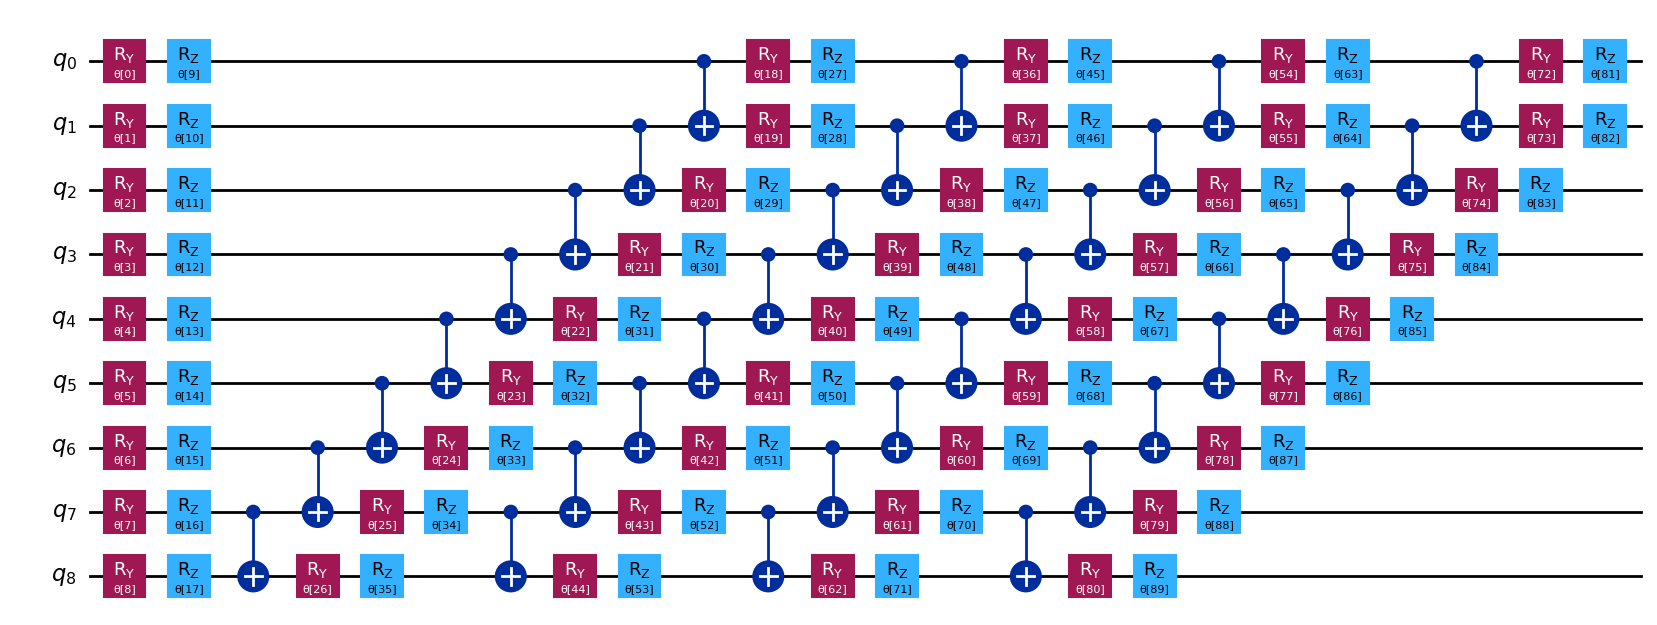

In [7]:
ansatz = ansatz = EfficientSU2(H0.num_qubits, reps=4)
ansatz.decompose().draw("mpl", style="iqp")

In [8]:
num_params = ansatz.num_parameters
num_params

90

In [9]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=1)

ansatz_isa = pm.run(ansatz)

In [10]:
#ansatz_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [11]:
hamiltonian_isa = H0.apply_layout(layout=ansatz_isa.layout)

In [12]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

In [13]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [14]:
x0 = 2 * np.pi * np.random.random(num_params)

In [15]:
x0

array([3.11541868, 2.93527574, 0.71286753, 1.21591607, 1.33314998,
       0.44790337, 2.19611443, 6.07358291, 4.06688968, 1.18856478,
       4.76636898, 5.45949644, 3.22671753, 3.22702539, 1.85784429,
       3.42039281, 2.73556319, 2.8734758 , 4.33092256, 3.89055369,
       5.68471634, 1.71925461, 5.82485902, 5.89653826, 1.90795832,
       2.43466764, 5.2712154 , 1.89774661, 5.52188421, 0.06448509,
       6.08429793, 3.43060124, 6.13858151, 3.23594153, 0.42256408,
       3.23008798, 4.56302245, 1.98057175, 4.62121995, 0.48906415,
       1.23205877, 1.51605162, 5.26125161, 3.67213228, 3.7414735 ,
       4.09374901, 3.48524224, 5.71693837, 5.9152267 , 3.30015795,
       3.45970491, 1.66766412, 4.69958838, 3.4081402 , 5.4425829 ,
       3.64655231, 3.86771119, 4.18783473, 5.78144087, 2.75542962,
       1.08962313, 3.38801318, 3.89326748, 3.35076034, 4.41710483,
       1.69986952, 0.39608829, 2.77436871, 5.49154702, 5.6969612 ,
       0.16569691, 5.03448722, 0.24396356, 4.79909925, 2.42781

In [16]:
with Session(backend=backend) as session:
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 10000

    res = minimize(
        cost_func,
        x0,
        args=(ansatz_isa, hamiltonian_isa, estimator),
        method="cobyla", options={'rhobeg': 4, 'tol': 1e-5, 'maxiter': 800}
    )

Iters. done: 1 [Current cost: 120.82604088139438]
Iters. done: 2 [Current cost: 119.78396912841788]
Iters. done: 3 [Current cost: 125.09921877014602]
Iters. done: 4 [Current cost: 131.49820543983265]
Iters. done: 5 [Current cost: 129.2213395024633]
Iters. done: 6 [Current cost: 114.27978837178098]
Iters. done: 7 [Current cost: 123.34149256108101]
Iters. done: 8 [Current cost: 111.3594925642165]
Iters. done: 9 [Current cost: 119.10595827412808]
Iters. done: 10 [Current cost: 117.22943949557461]
Iters. done: 11 [Current cost: 117.4593314375636]
Iters. done: 12 [Current cost: 113.30827715732939]
Iters. done: 13 [Current cost: 115.81610704223901]
Iters. done: 14 [Current cost: 117.94922847658852]
Iters. done: 15 [Current cost: 116.7568396370654]
Iters. done: 16 [Current cost: 112.03075679877054]
Iters. done: 17 [Current cost: 108.27384552792357]
Iters. done: 18 [Current cost: 104.5923028609378]
Iters. done: 19 [Current cost: 112.3912133704713]
Iters. done: 20 [Current cost: 113.71151901267

In [17]:
print(session.details())

None


In [18]:
res

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 37.392197066013054
       x: [ 7.216e+00  3.204e+00 ...  2.509e+00  5.020e+00]
    nfev: 800
   maxcv: 0.0

In [19]:
res.x

array([ 7.21646877e+00,  3.20400054e+00,  2.09474391e-01,  2.47533250e-01,
        4.93727134e+00, -4.51518212e-03,  6.43581810e+00,  5.59902442e+00,
        4.12279588e+00,  3.74731307e+00,  2.97027119e+00,  5.13562931e+00,
        3.22044476e+00,  4.10312394e+00,  2.80682260e+00,  7.42355694e+00,
        6.55325305e+00,  1.59775454e+00,  3.37566940e+00,  3.58956624e+00,
        4.86296886e+00,  1.65164019e+00,  5.06116480e+00,  7.49820590e+00,
        1.97308565e+00,  1.78681351e+00,  4.46298637e+00,  2.03451983e+00,
        4.49661004e+00, -3.35844196e-01,  6.67687620e+00,  2.50729935e+00,
        6.14738835e+00,  3.65374016e+00,  9.27809338e-01,  3.14534089e+00,
        3.94477915e+00,  1.72694110e+00,  4.42898940e+00,  1.27594870e+00,
        1.50055936e+00,  1.30168971e+00,  5.07053886e+00,  3.14988316e+00,
        3.55619202e+00,  4.32385332e+00,  3.31226466e+00,  6.66094477e+00,
        1.00040798e+01,  3.37688203e+00,  3.03401662e+00,  9.48367338e-01,
        4.52218462e+00,  

In [20]:
all(cost_history_dict["prev_vector"] == res.x)

False

In [21]:
cost_history_dict["iters"] == res.nfev

True

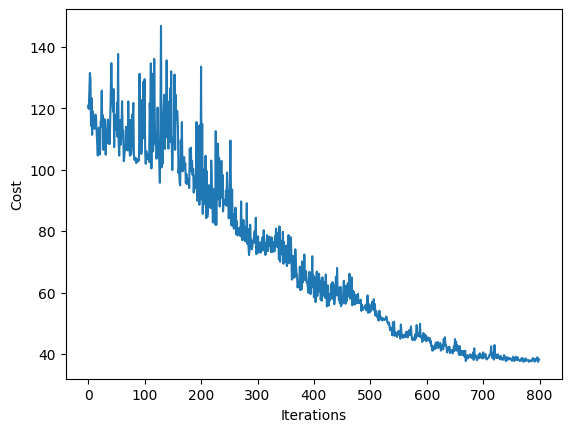

In [22]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [23]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Assign solution parameters to ansatz
qc = ansatz_isa.assign_parameters(res.x)
# Add measurements to our circuit
qc.measure_all()
pub= (qc, )
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
#print(final_distribution_int)


In [24]:
# auxiliary functions to sample most likely bitstring
def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring = to_bitstring(most_likely, H0.num_qubits)
most_likely_bitstring.reverse()

print("Result bitstring:", most_likely_bitstring)

Result bitstring: [1, 0, 1, 0, 1, 1, 1, 1, 0]


In [25]:
# Sort the dictionary items by values in descending order
sorted_items = sorted(counts_bin.items(), key=lambda x: x[1], reverse=True)
# Display the sorted key-value pairs
for key, value in sorted_items:
    print(f'{key}: {value}')

011110101: 3259
011110100: 986
011101110: 846
011101101: 558
011101111: 513
010101111: 424
110101111: 423
011110001: 203
111110101: 186
011110111: 163
011010101: 155
110110101: 139
010110101: 97
011010100: 92
011100101: 86
011101100: 77
011100111: 67
110100101: 64
011100100: 48
111010101: 47
011110110: 46
010101110: 45
110101110: 45
110101011: 40
111101111: 39
011111100: 39
101001110: 36
011001110: 33
011110000: 33
010100101: 32
011110010: 32
011111101: 31
011111111: 30
011010111: 30
011101001: 29
011111110: 28
111001110: 27
110110111: 25
111001111: 24
111010100: 22
101001111: 21
011001101: 21
111001101: 20
110101001: 19
110111110: 19
110100100: 19
110110100: 18
011101010: 18
011101011: 18
011010001: 17
010101101: 17
110001111: 17
100010101: 16
011011111: 16
010101011: 16
110100111: 16
101001101: 16
110110010: 15
010100111: 14
101010101: 14
011111001: 13
101101111: 13
011000101: 13
011100001: 12
011101000: 12
110111111: 12
010100100: 12
110001110: 12
010001111: 11
110111101: 11
0111110

In [26]:
#import json
#from qiskit_ibm_runtime import RuntimeEncoder
#with open("4c_sim_20_tsp_result.json", "w") as file:
#    json.dump(job.result(), file, cls=RuntimeEncoder)